In [12]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Input data files are available in the "input" directory.
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

bitcoin_cash_price.csv
bitcoin_dataset.csv
bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_classic_price.csv
ethereum_dataset.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



In [13]:
# Bitcoin
df = pd.read_csv("input/bitcoin_price.csv", parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-08-29,4389.21,4625.68,4352.13,4579.02,"2,486,080,000","72,553,800,000"
1,2017-08-28,4384.45,4403.93,4224.64,4382.66,"1,959,330,000","72,467,900,000"
2,2017-08-27,4345.10,4416.59,4317.29,4382.88,"1,537,460,000","71,809,200,000"
3,2017-08-26,4372.06,4379.28,4269.52,4352.40,"1,511,610,000","72,249,100,000"
4,2017-08-25,4332.82,4455.70,4307.35,4371.60,"1,727,970,000","71,595,100,000"


/Users/benjamingahtan/Projects/Sandbox/.virtualenv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


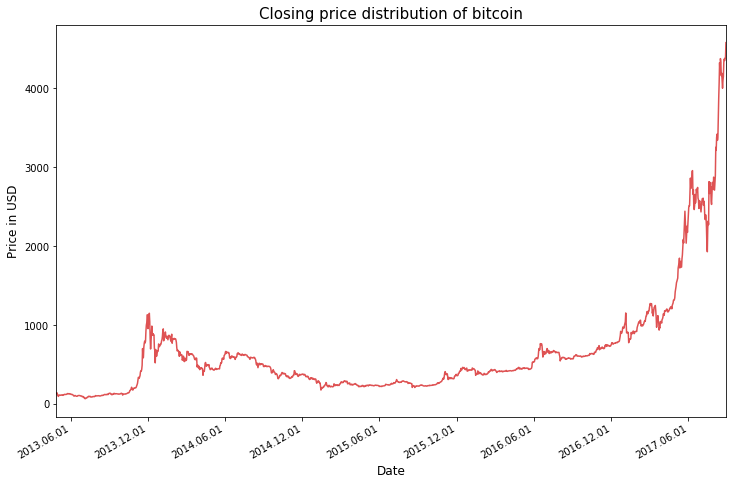

In [14]:
import matplotlib.dates as mdates
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

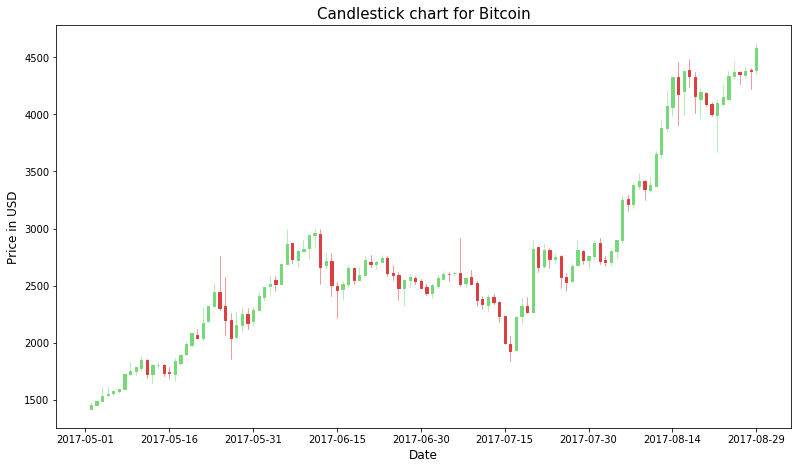

In [15]:
# Plot candlestick chart to see bullish and bearish signs
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Date']>'2017-05-01']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

/Users/benjamingahtan/Projects/Sandbox/.virtualenv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


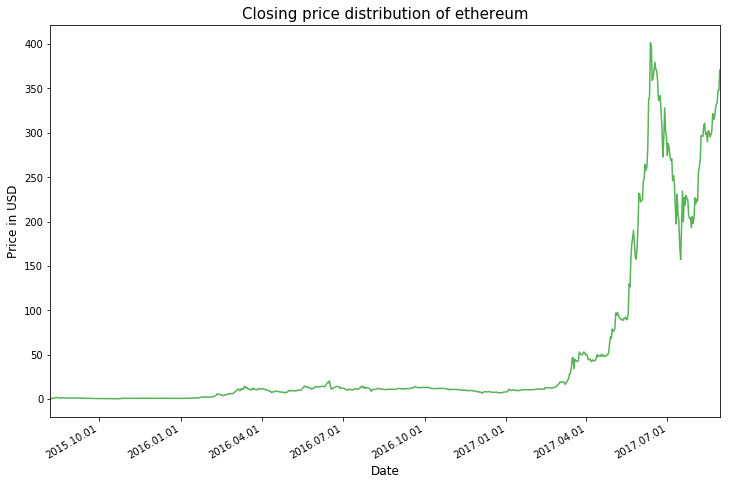

In [16]:
# Analysis changes based on below INPUT_FILE variable
INPUT_FILE = "ethereum_price.csv"

currency_name = INPUT_FILE.split("_")[0]
df = pd.read_csv("input/" + INPUT_FILE, parse_dates=['Date'])
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of "+currency_name, fontsize=15)
plt.show()

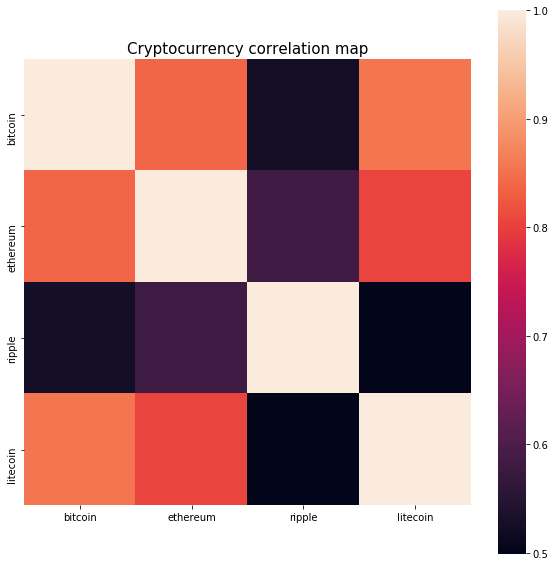

In [17]:
# Reveal correlations between cryptocoins by modifying below files_to_use array
files_to_use = ["bitcoin_price.csv", "ethereum_price.csv", "ripple_price.csv", "litecoin_price.csv"]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[0]
    if ind == 0:
        df = pd.read_csv("input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("input/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df.head()
        
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.show()

In [36]:
# Making timeseries predictions based on fbprophet python library
INPUT_FILE = "bitcoin_price.csv"

from fbprophet import Prophet
df = pd.read_csv("input/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
df.columns = ["ds", "y"]

m = Prophet()
m.fit(df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1610,2017-09-24,3653.712281,3472.239406,3852.911732
1611,2017-09-25,3667.949310,3485.567186,3853.271184
1612,2017-09-26,3678.821236,3490.375269,3871.791422
1613,2017-09-27,3681.029562,3486.837413,3875.913562
1614,2017-09-28,3692.662445,3504.457252,3877.022900


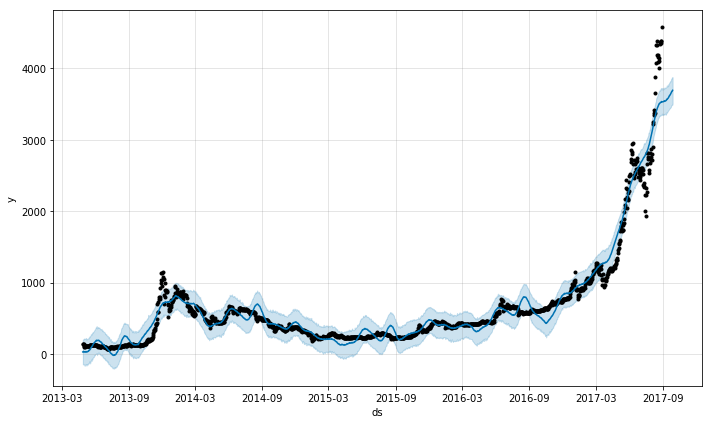

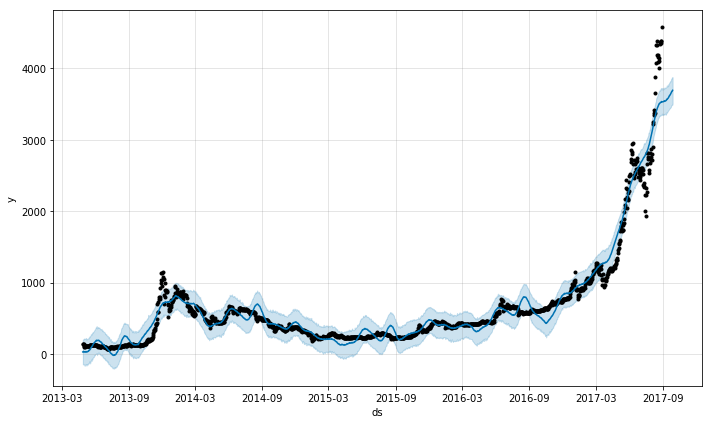

In [37]:
m.plot(forecast)

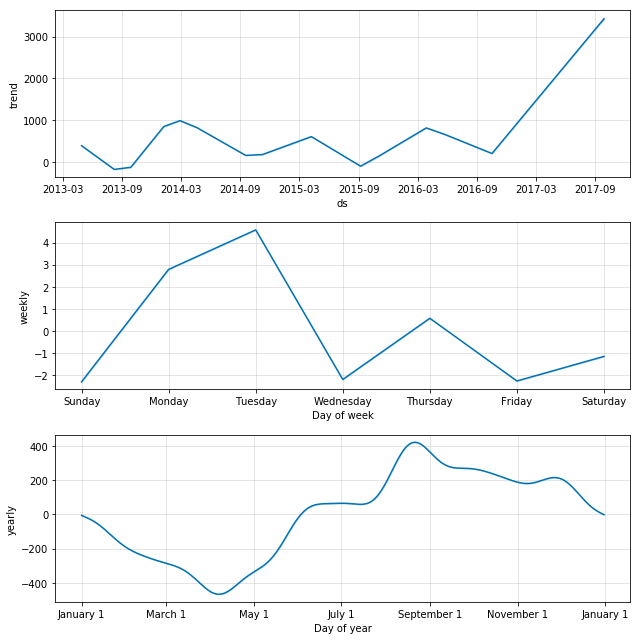

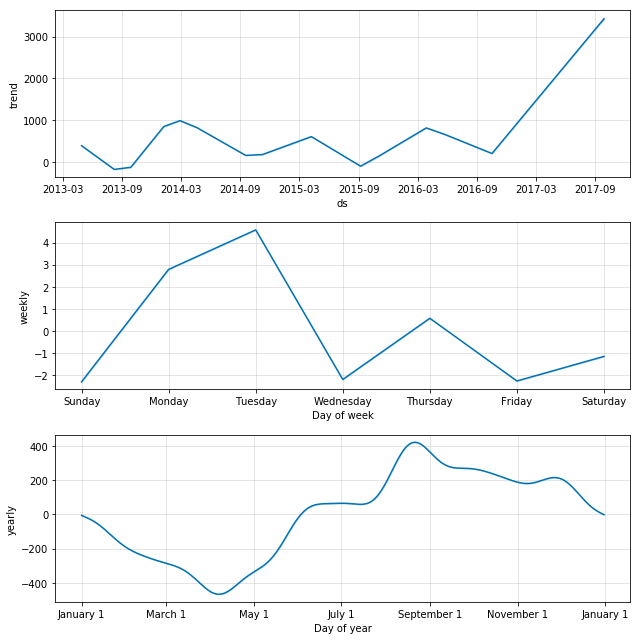

In [38]:
# Seperate forecast by components
m.plot_components(forecast)